In [28]:
import pandas as pd
import numpy as np

In [29]:
import seaborn as sns
%matplotlib inline

In [14]:
df=pd.read_csv('heart.csv')

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
scaler.fit(df.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled_feat=scaler.transform(df.drop('target',axis=1))

In [23]:
X=scaled_feat
y=df['target']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))
    

In [37]:
import matplotlib.pyplot as plt

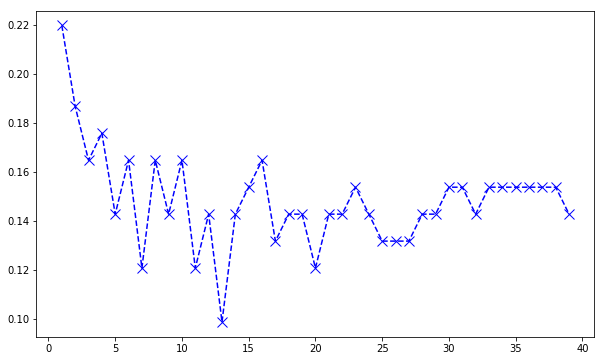

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='x',markerfacecolor='red',markersize=10)


In [46]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
pred2=knn.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
print(confusion_matrix(pred2,y_test))

[[37  2]
 [ 7 45]]


In [49]:
print(classification_report(pred2,y_test))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89        39
          1       0.96      0.87      0.91        52

avg / total       0.91      0.90      0.90        91

